
# <div align="center">TELECOMMUNICATION CHURN PREDICTION</div>

# 1.Business Understanding

SyriaTel, a telecommunications company, is facing a significant challenge in retaining its customers. Customer churn, or the rate at which customers discontinue their services, poses a threat to the company's revenue and market position. Understanding customer churn is crucial for SyriaTel to develop strategies aimed at retaining customers and mitigating revenue loss.

Reducing churn requires identifying patterns and factors that contribute to customers leaving SyriaTel. By analyzing customer behavior, usage patterns, and demographic information, SyriaTel can predict which customers are likely to churn and take proactive measures to retain them. This involves building a classifier to predict customer churn based on historical data and relevant features.

# 2.Data Understanding

The provided dataset for SyriaTel customer churn prediction includes various features that offer insights into customer behavior and characteristics.The dataset's focus is on understanding customer behavior through usage patterns, subscription plans, and customer service interactions to predict the likelihood of churn. The challenge is to leverage this data effectively for building a predictive model that can assist SyriaTel in identifying customers at risk of churning and implementing targeted retention strategies. Features such as service usage, international calling, and customer service interactions are likely to be key contributors to the predictive model.




# 3.Data Preparation
This section is dedicated to preparing our data for exploration and modeling. A thorough examination is conducted, looking out for:

1. Duplicate rows that need attention.
2. Identifying and addressing any missing values.
3. Assessing the relevance of each column, excluding those that do not significantly contribute to our analysis.

### Importing Relevant liblaries


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Loading data

In [34]:
df = pd.read_csv('data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Summarized understanding of the key variables:

#### i.) Demographic Information:

State: Geographic location of the customer, potentially providing regional insights.

Account Length: Duration of the customer's subscription with SyriaTel.

#### ii.) Telecommunication Usage Patterns:

Area Code and Phone Number: Identifiers not directly impactful for churn prediction.

International Plan: Binary indicator of international calling subscription.

Voice Mail Plan: Binary indicator of voicemail service subscription.

Number Vmail Messages: Count of voicemail messages received by the customer.

#### iii.) Usage Metrics:

Total Day Minutes, Total Day Calls, Total Day Charge: Usage patterns during daytime hours.

Total Eve Minutes, Total Eve Calls, Total Eve Charge: Usage patterns during evening hours.

Total Night Minutes, Total Night Calls, Total Night Charge: Usage patterns during nighttime hours.

Total Intl Minutes, Total Intl Calls, Total Intl Charge: Metrics related to international calls.

#### iv.) Customer Interaction and Service:

Customer Service Calls: Number of calls made to customer service, indicating potential issues or concerns.

#### v.) Churn Indicator:

Churn: Binary variable indicating whether a customer has churned or not, serving as the target variable for prediction.




In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The  DataFrame contains information on 3333 instances with 21 columns, representing various attributes related to telecommunications.No missing values are present in the dataset.

### Check for duplicated rows

In [78]:

df.duplicated().sum()

0

 There is no duplicated rows to deal with.

### Drop Unnecessary Columns

Drop "State," "Account Length," "Area Code," and "Phone Number" as they are not likely to contribute to the prediction.

In [36]:
df=df.drop(['state'], axis=1)


In [37]:
df=df.drop(['account length','area code','phone number'], axis=1)


In [38]:
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Encode Categorical Variables
Convert "International Plan" , "Voice Mail Plan" and "churn " into binary values.

In [39]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])


In [40]:
df.head()

,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Exploratory data analysis

#### Conducting an in-depth analysis of the 'churn' feature:
In the scope of this analysis, we designate 'churn' as the dependent variable.
The 'churn' feature serves as an indicator of whether a customer has concluded their association with SyriaTel. A '1' value denotes contract termination, while '0' signifies the customer's retention of an ongoing and active account.

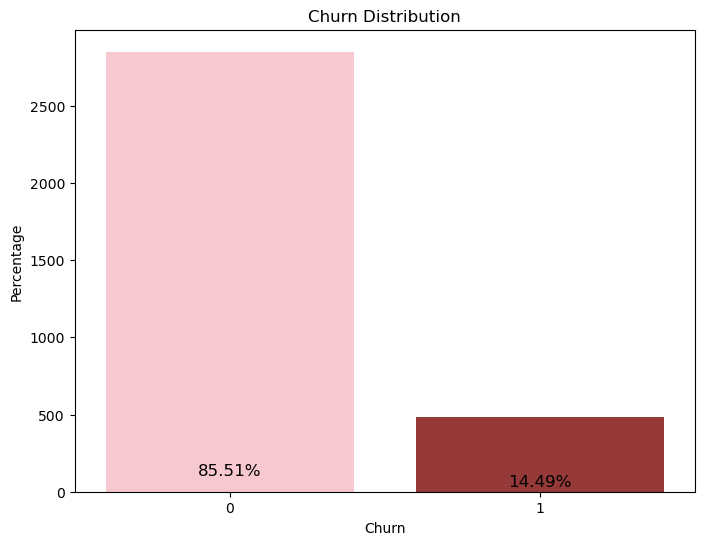

In [86]:
# 1. Class distribution with percentages
plt.figure(figsize=(8, 6))
churn_counts = df['churn'].value_counts(normalize=True) * 100
sns.countplot(x='churn', data=df, palette=['pin', 'brown'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Percentage')
for i, count in enumerate(churn_counts):
    plt.text(i, count + 1, f'{count:.2f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.show()

The dataset is unbalanced with about 14.49% of  objects belonging to class 1. 
The  imbalance in the data is requiring attention prior to modeling. Addressing this imbalance is crucial, as an uneven feature distribution may lead the model to generate inaccurate predictions.

### Hypothesis Testing for Total Day Minutes:

Null Hypothesis (H0): There is no significant difference in the average total day minutes between customers who churn and customers who do not churn.

Alternative Hypothesis (H1): There is a significant difference in the average total day minutes between customers who churn and customers who do not churn.

Test Method: Two-sample t-test (assuming the data distribution is approximately normal) or Mann-Whitney U test (non-parametric test if the data is not normally distributed).

Significance Level (α): Typically set at 0.05.

In [88]:
from scipy.stats import ttest_ind

# Example data (replace with your actual data)
total_day_minutes_churn = df[df['churn'] == 1]['total day minutes']
total_day_minutes_no_churn = df[df['churn'] == 0]['total day minutes']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(total_day_minutes_churn, total_day_minutes_no_churn)

# Print results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Compare p-value to significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. No significant difference.")


t-statistic: 12.097552860782955
p-value: 5.300278227492294e-33
Reject the null hypothesis. There is a significant difference.


The t-statistic of 12.10 is associated with a very small p-value (5.30e-33). This suggests that the average total day minutes for customers who churn are significantly different from the average total day minutes for customers who do not churn. In practical terms, this indicates that the total day minutes might be an important factor or a distinguishing feature when predicting customer churn.

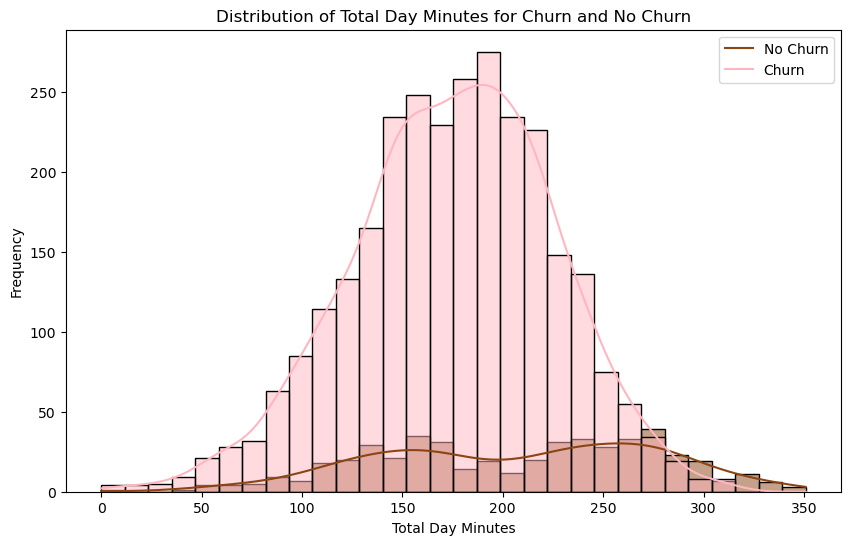

In [101]:
# Visualize the distribution of total day minutes for churn and no churn with pink and brown colors
plt.figure(figsize=(10, 6))
sns.histplot(df, x='total day minutes', hue='churn', bins=30, kde=True, palette=["#FFB6C1", "#8B4513"])
plt.title('Distribution of Total Day Minutes for Churn and No Churn')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.legend(labels=['No Churn', 'Churn'])
plt.show()


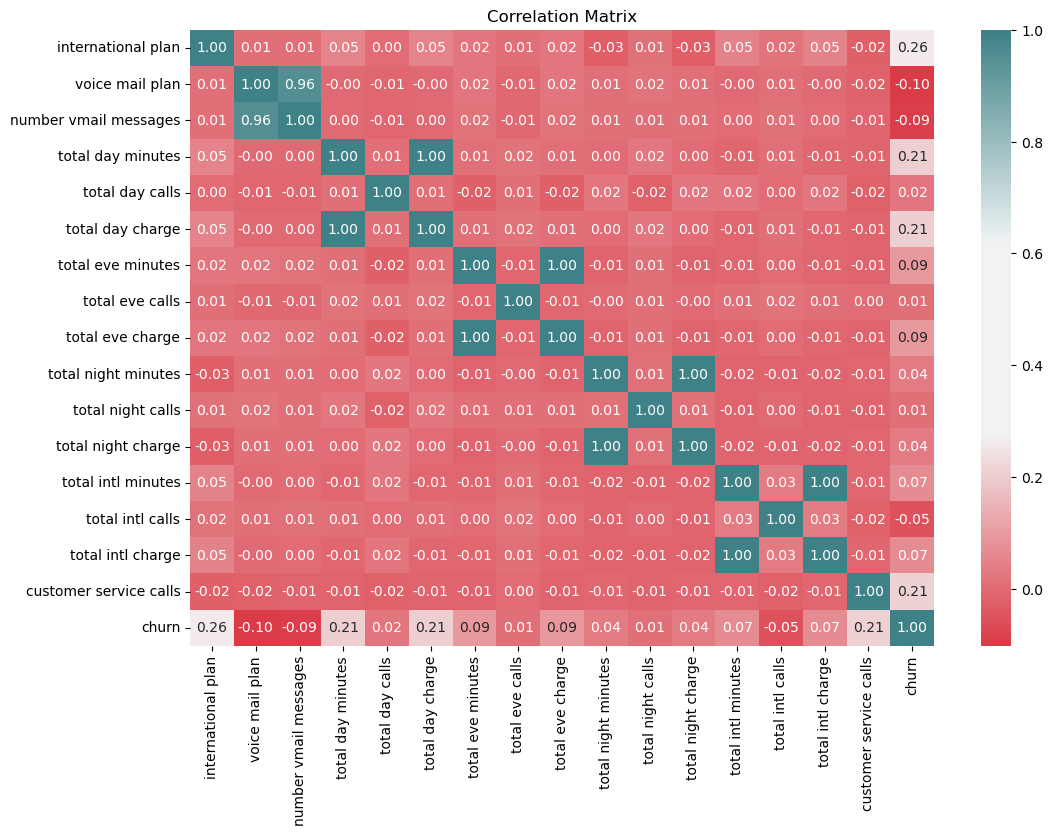

In [52]:
# 2. Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(10, 200, sep=80, as_cmap=True), fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Most of the characteristics exhibit no significant correlation, although a few demonstrate a complete positive correlation. Specifically, the features Total day charge and Total day minutes exhibit a perfect positive correlation. Similarly, Total eve charge and Total eve minutes, Total night charge and Total night minutes, as well as Total int charge and Total int minutes, also display full positive correlations. The logical explanation for these perfect correlations lies in the direct relationship between the charge and the corresponding minutes used. The correlation coefficient of 1 indicates the presence of perfect multicollinearity. 

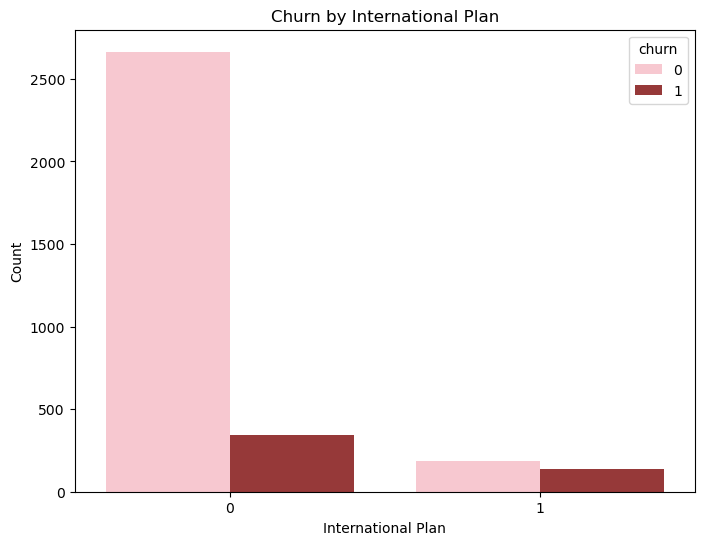

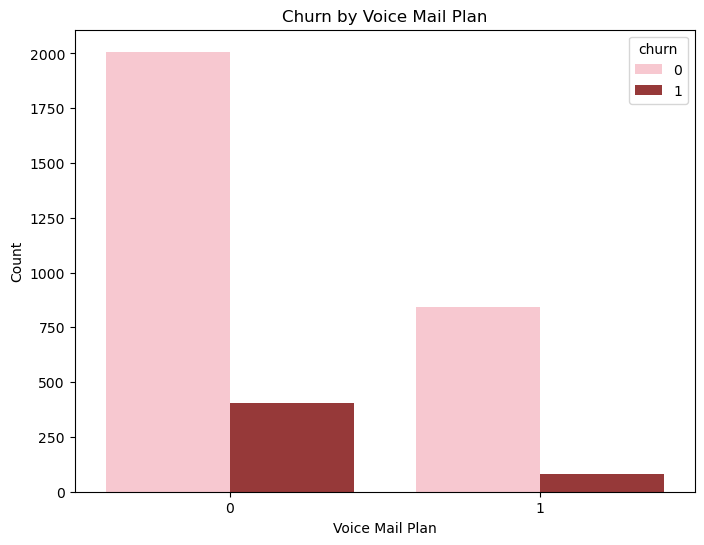

In [90]:
# 3. Categorical variable exploration
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan', hue='churn', data=df, palette=['pink', 'brown'])
plt.title('Churn by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='voice mail plan', hue='churn', data=df, palette=['pink', 'brown'])
plt.title('Churn by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.show()

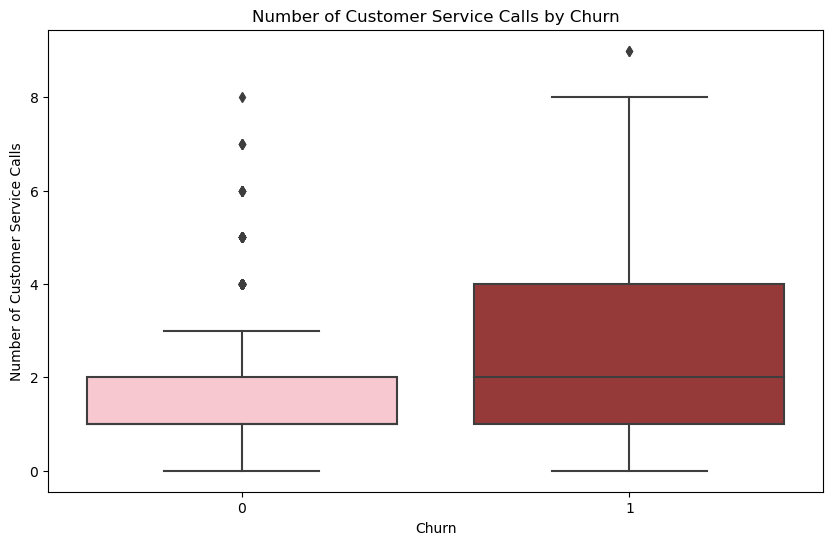

In [56]:
 # 4.Customer service calls analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='customer service calls', data=df, palette=['pink', 'brown'])
plt.title('Number of Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')
plt.show()

###  Splitting the Data:
Split the dataset into 80% training and 20% testing sets.

In [59]:

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Simple baseline Model

In [61]:
baseline_model = RandomForestClassifier(n_estimators=50, max_depth=None, random_state=42)
baseline_model.fit(X_train, y_train)

# Evaluate Baseline Model
y_pred_baseline = baseline_model.predict(X_test)
print("Simple Baseline Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))

Simple Baseline Model:
Accuracy: 0.9460269865067467
Confusion Matrix:
 [[561   5]
 [ 31  70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.93      0.69      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.84      0.88       667
weighted avg       0.95      0.95      0.94       667



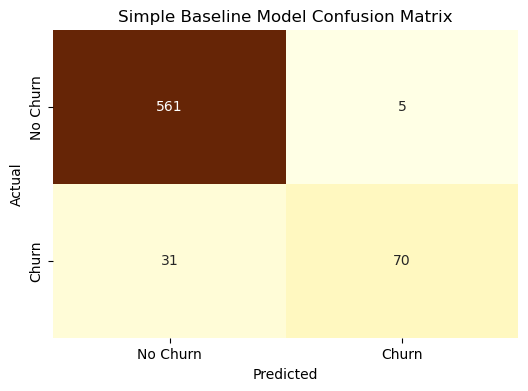

In [84]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title, cmap):
    plt.figure(figsize=(6, 4))
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix heatmap with custom color palette
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Custom color palettes
brown_cmap = "YlOrBr"  # Brown colormap

# Plot confusion matrices for each model with custom color palette
plot_confusion_matrix(baseline_model, X_test, y_test, "Simple Baseline Model Confusion Matrix", brown_cmap)



The Simple Baseline Model (Random Forest with default parameters) is performing well with an accuracy of approximately 94.6%. 

The proportion of correctly classified instances. In this case, it's 94.6%, which is quite good.

The precision for class 0 (no churn) is 95%, meaning that among the instances predicted as not churn, 95% were actually not churn. The precision for class 1 (churn) is 93%, indicating that among the instances predicted as churn, 93% were actually churn.

The recall for class 0 is 99%, meaning that among the actual instances of not churn, 99% were correctly identified. The recall for class 1 is 69%, indicating that among the actual instances of churn, 69% were correctly identified.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The weighted average F1-score is around 94%.

Overall, the model seems to be doing well, but there is a trade-off between precision and recall, especially for class 1.

### More-Complex Model

In [62]:
# More-Complex Model
complex_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
complex_model.fit(X_train, y_train)

# Evaluate More-Complex Model
y_pred_complex = complex_model.predict(X_test)
print("More-Complex Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_complex))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_complex))
print("Classification Report:\n", classification_report(y_test, y_pred_complex))

More-Complex Model:
Accuracy: 0.9490254872563718
Confusion Matrix:
 [[561   5]
 [ 29  72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.94      0.71      0.81       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



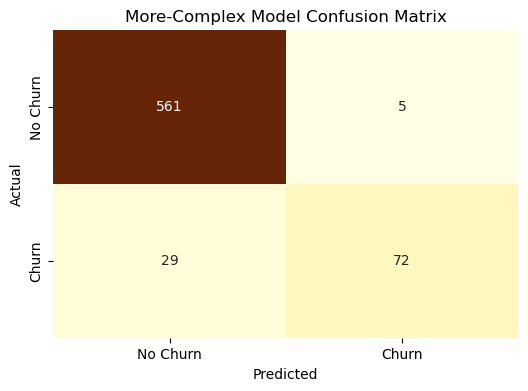

In [80]:

plot_confusion_matrix(complex_model, X_test, y_test, "More-Complex Model Confusion Matrix", brown_cmap)



The More-Complex Model (Random Forest with specific parameters) shows a slight improvement in accuracy compared to the Simple Baseline Model, achieving around 94.9%. Let's interpret the evaluation metrics:

The accuracy has increased slightly, indicating that the more-complex model performs marginally better on the given dataset.

The precision for class 0 (no churn) remains at 95%, and for class 1 (churn), it has increased to 94%. This suggests that the more-complex model is more precise in predicting instances of churn.

The recall for class 0 is still 99%, while the recall for class 1 has increased to 71%. This indicates that the more-complex model is better at identifying instances of churn compared to the baseline model.

The weighted average F1-score has increased to around 95%, demonstrating an overall improvement in the balance between precision and recall.

Overall, the more-complex model is showing some improvement, especially in correctly identifying instances of churn. 

## Hyperparameter-Tuned Model


In [70]:

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
tuned_model = grid_search.best_estimator_

# Evaluate Hyperparameter-Tuned Model
y_pred_tuned = tuned_model.predict(X_test)
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))

Best Hyperparameters: {'max_depth': None, 'n_estimators': 50}
Accuracy: 0.9460269865067467
Confusion Matrix:
 [[561   5]
 [ 31  70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.93      0.69      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.84      0.88       667
weighted avg       0.95      0.95      0.94       667



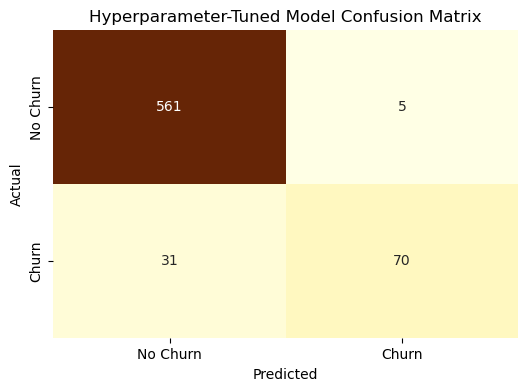

In [82]:
plot_confusion_matrix(tuned_model, X_test, y_test, "Hyperparameter-Tuned Model Confusion Matrix", brown_cmap)

The Hyperparameter-Tuned Model, with the best hyperparameters of {'max_depth': None, 'n_estimators': 50}, shows similar performance to the Simple Baseline Model:

The accuracy remains approximately 94.6%, which is consistent with the baseline model.

Precision, Recall, and F1-score: The precision, recall, and F1-score for both classes (0 and 1) are also similar to the baseline model.

The hyperparameters max_depth=None and n_estimators=50 were identified as the best during the hyperparameter tuning process. This implies that, for this specific dataset, the best model complexity is achieved with an unlimited tree depth (max_depth=None) and a moderate number of trees (n_estimators=50).

In this case, the hyperparameter tuning process did not lead to a significant improvement in performance compared to the baseline model. Further tuning or trying different algorithms could be explored to find the optimal configuration.

### Feature Importance Analysis



Top 6 features contributing to churn:
1. total day charge: 0.16151368088367032
2. customer service calls: 0.13957555542481376
3. total day minutes: 0.1346238260373992
4. international plan: 0.1001409368768786
5. total eve minutes: 0.07147695111964834
6. total eve charge: 0.06846741671576159


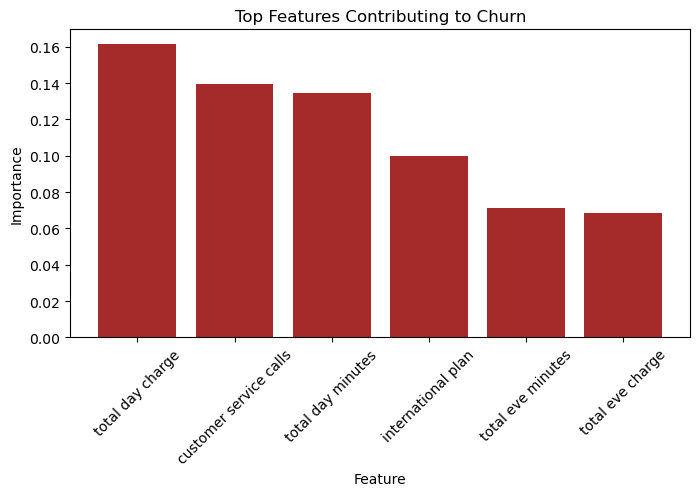

In [97]:

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
feature_importances =complex_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Replace with your actual feature names or column names

# Sort features based on importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Display the top N features
top_n = 6
top_feature_indices = sorted_indices[:top_n]
top_features = feature_names[top_feature_indices]

# Set the color to brown
bar_color = 'brown'

# Print and plot feature importance
print("Top", top_n, "features contributing to churn:")
for i, feature in enumerate(top_features):
    print(f"{i + 1}. {feature}: {feature_importances[top_feature_indices[i]]}")

# Plot feature importances with brown bars
plt.figure(figsize=(8, 4))
plt.bar(range(top_n), feature_importances[top_feature_indices], align="center", color=bar_color)
plt.xticks(range(top_n), top_features, rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top Features Contributing to Churn")
plt.show()

Based on the provided Top 6 feature importances, the conclusions that can be drawn are:

Customers with higher total day charges are more likely to churn.
This could indicate that pricing or service plans related to daytime usage are influencing customer decisions.

A higher number of customer service calls is strongly associated with an increased likelihood of churn.
It suggests that customers who require frequent assistance or have unresolved issues are more prone to leaving.

The total number of daytime minutes used by customers contributes significantly to predicting churn.
This could indicate dissatisfaction with the service quality during the day or overutilization of services.

Customers subscribed to an international plan are more likely to churn.
This suggests that the international plan, possibly related to pricing or service quality, might be a contributing factor.

The total number of evening minutes is a moderately influential factor in predicting churn.
Evening usage patterns may be indicative of customer behavior and satisfaction.

The total charges for evening usage also play a role in predicting churn.
Similar to evening minutes, this could be related to pricing or service quality during the evening hours.


### Conclusion

The top features contributing to churn include both usage-related factors (total day/evening minutes, charges) and customer service interactions.
Pricing, service quality during specific time periods, and customer service effectiveness are critical aspects influencing customer decisions to churn.
These insights can guide strategic efforts to improve service quality, adjust pricing plans, and enhance customer service to mitigate churn risk.

### Recommendations

**1.Pricing Plan Optimization:**

Conduct a comprehensive review of pricing plans, with a specific focus on total day charges. Consider introducing competitive pricing strategies, discounts, or bundled offerings to attract and retain customers. Ensure that pricing plans align with customer expectations and market benchmarks.

**2.Enhanced Customer Service Strategies:**

Invest in improving customer service quality to reduce the number of customer service calls. Implement training programs for customer service representatives to efficiently address customer concerns, provide timely resolutions, and enhance overall customer satisfaction. A streamlined and responsive customer service experience can significantly impact retention.

**3.International Plan Refinement:**

Evaluate the international plan offering and identify reasons why customers with this plan are more likely to churn. Consider adjusting the features, pricing, or communication strategies associated with the international plan to improve customer retention within this segment. Tailor offerings to meet the specific needs of international plan subscribers.

**4.Proactive Customer Engagement Programs:**

Launch targeted customer engagement programs for customers exhibiting high daytime or evening usage. Provide personalized promotions, loyalty programs, or exclusive services to incentivize continued subscription and demonstrate the company's commitment to meeting customer needs. Proactive communication can foster a stronger connection with customers and reduce churn.

These recommendations address key areas influencing churn, including pricing, customer service, international plans, and proactive customer engagement. Implementing these strategies collectively can create a more comprehensive approach to reducing churn and enhancing the overall customer experience. Regular monitoring and adaptation based on feedback and performance metrics will be crucial for success.
